In [177]:
from decimal import Decimal
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('..\\..\\datasets\\2. spotify_tracks\\dataset.csv')
pd.reset_option('display.max_rows')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualizaciones en Python

**Alumno**: Javier López Malone 

**Profesora**: Estefania Karina Susanj 

**Tutor**: Rubén Baquel

**Dataset seleccionado**: Spotify tracks

## Información del dataset y descripción de las columnas

Es un conjunto de datos de pistas de Spotify en una variedad de 125 géneros diferentes. Cada pista tiene algunas funciones de audio asociadas.

### Descripción de las columnas


* **track_id** : ID de Spotify para la pista.
* **artists** : Nombres de los artistas que interpretaron la pista. Si hay más de un artista, están separados por un;
* **album_name** : Nombre del álbum en el que aparece la pista.
* **track_name** : Nombre de la pista.
* **popularity** : Popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular . La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y en lo recientes que son esas reproducciones. En términos generales, las canciones que se reproducen mucho ahora tendrán mayor popularidad que las canciones que se reproducen mucho en el pasado. Las pistas duplicadas (por ejemplo, la misma pista de un sencillo y un álbum) se clasifican de forma independiente. La popularidad del artista y del álbum se deriva matemáticamente de la popularidad de la pista.
* **duration_ms** : Duración de la pista en milisegundos.
* **explicit** : Indica si la pista tiene letras explícitas o no (verdadero = sí, falso = no tiene o es desconocido)
* **danceability** : Describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 es el más bailable.
* **energy** : Es una medida de 0,0 a 1,0 y representa una medida perceptual de intensidad y actividad. Normalmente, las pistas enérgicas se sienten rápidas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach obtiene una puntuación baja en la escala.
* **key** : Clave en la que se encuentra la pista. Los números enteros se asignan a los tonos utilizando la notación estándar de clase de tono. Por ejemplo 0 = C, 1 = C♯/D♭, 2 = D, etc. Si no se detectó ninguna clave, el valor es -1.
* **loudness** : El volumen general de una pista en decibeles (dB).
* **mode** : Indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. El mayor está representado por 1 y el menor es 0.
* **speechiness** : Detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente hablada sea la grabación (p. ej., programa de entrevistas, audiolibro, poesía), más cercano a 1,0 será el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén compuestas exclusivamente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener música y voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representen música y otras pistas que no sean de voz.
* **acousticness** : Es una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.
* **instrumentalness** : Indica si una pista no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal.
* **liveness** : Detecta la presencia de una audiencia en la grabación. Los valores de vida más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.
* **valence** : Una medida de 0,0 a 1,0 que describe la positividad musical transmitida por una pista. Las pistas con valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las pistas con valencia baja suenan más negativas (p. ej., tristes, deprimidas, enojadas).
* **tempo** : El tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza determinada y se deriva directamente de la duración promedio del tiempo.
* **time_signature** : un compás estimado. El tipo de compás (metro) es una convención de notación para especificar cuántos tiempos hay en cada compás. El tipo de compás varía de 3 a 7, lo que indica tipos de compás de 3/4, a 7/4.
* **track_genre** : El género al que pertenece la pista.

### Información de mi dataset

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [179]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.68,0.46,...,-6.75,0,0.14,0.03,0.00,0.36,0.71,87.92,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.17,...,-17.23,1,0.08,0.92,0.00,0.10,0.27,77.49,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.44,0.36,...,-9.73,1,0.06,0.21,0.00,0.12,0.12,76.33,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.27,0.06,...,-18.52,1,0.04,0.91,0.00,0.13,0.14,181.74,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.62,0.44,...,-9.68,1,0.05,0.47,0.00,0.08,0.17,119.95,4,acoustic


In [180]:
print (f"Hay {df['track_genre'].nunique()} géneros musicales en mi dataset")

Hay 114 géneros musicales en mi dataset


Mi muestra tiene inicialmente 1000 canciones por género musical.

In [181]:
df.groupby('track_genre')['track_id'].count()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: track_id, Length: 114, dtype: int64

## Limpieza de datos

In [182]:
# HELPER FUNCTIONS

def get_outliers_IQR(dataFrame: pd.DataFrame, columns:str|list=None):
    """ Calculates dataframe column outliers based on interquartile range (IQR)
    """
    if columns is None:
        columns = dataFrame[dataFrame.columns[(dataFrame.dtypes == 'float64') | (dataFrame.dtypes == 'int64')]].columns.to_list()
    
    if columns:
        Q1 = dataFrame[columns].quantile(0.25)
        Q3 = dataFrame[columns].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        return (dataFrame[columns] < lower_bound) | (dataFrame[columns] > upper_bound)
    else:
        return None

Elimino columna _Unnamed: 0_

In [183]:
column_to_drop = 'Unnamed: 0'

if column_to_drop in df.columns:
    df.drop(column_to_drop, axis='columns', inplace=True)

Elimino nulos de la columna _artists_

In [184]:
print(df.isnull().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [185]:
df[df['artists'].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.50,0.58,7,-9.46,0,0.06,0.69,0.00,0.07,0.73,138.39,4,k-pop


In [186]:
df.dropna(subset=['artists'], inplace=True)

Verifico si hay duplicados

In [187]:
duplicates = df[df.duplicated(keep=False)].value_counts(subset=['track_id', 'artists', 'album_name', 'track_name']).reset_index()
print("Filas duplicadas:")
duplicates

Filas duplicadas:


,track_id,artists,album_name,track_name,count
0,6P2z6tZi1K8pyHXV1i0DnK,Nikolay Kopylov,У камина (Старинные Русские Романсы)/ At a Fir...,Твои глаза зеленые ( Green Eyes),3
1,0jI5ex80hYYbLQsX3G5Ze7,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,The Well,3
2,2abeQBWSIzjO8J1KrPFZHy,Oleg Pogudin,Русский романс. Часть I,Забыли вы…,3
3,52VSOpFbg4GBpPNNv4ulbP,"Группа ""Загадка""",20 золотых дворовых песен. Разлука,В больнице больная лежала,3
4,5sP7Jb0FBF2fatb1CZ3zpa,Hans Zimmer;Lisa Gerrard;Gavin Greenaway;The L...,Hans Zimmer: Epic Scores,"The Gladiator Waltz - From ""Gladiator"" Soundtrack",3
...,...,...,...,...,...
439,2ldVpRwLjfUWCDqrjNQYWt,Daddy Yankee;Bad Bunny,Perreo en Halloween,X ÚLTIMA VEZ,2
440,2lTWvfqX8itVpHvQ8EMhS6,Wolfgang Amadeus Mozart;Academy of St. Martin ...,Mozart - All Day Classics,"The London Sketchbook, K. 15a-ss (arr. and/or ...",2
441,2k07yELPvHZEqwdRzROUpc,Hans Zimmer;Adam Lukas;James Everingham;AURORA,Frozen Planet II (Original Television Soundtrack),Losing Ice,2
442,2jqBkZ3VhBeuTLwXZtfSGe,Georgi Vinogradov;The Red Army Choir,Когда поют солдаты...,Соловьи,2


Elimino los duplicados

In [188]:
df.drop_duplicates(subset=['track_id', 'artists', 'album_name', 'track_name'], keep='first', inplace=True)

Verifico cantidad de canciones con popularidad baja

In [189]:
low_popularity_limit = 2

| Popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular . La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y en lo recientes que son esas reproducciones. En términos generales, las canciones que se reproducen mucho ahora tendrán mayor popularidad que las canciones que se reproducen mucho en el pasado. Las pistas duplicadas (por ejemplo, la misma pista de un sencillo y un álbum) se clasifican de forma independiente. La popularidad del artista y del álbum se deriva matemáticamente de la popularidad de la pista.

Dado que popularidad se calcula en base a las reproducciones y lo reciente que son estas. Se puede considerar este límite como datos que no son datos interesantes para el estudio.

In [190]:
df[df['popularity']<=low_popularity_limit]['track_id'].count()

11027

In [191]:
print(f"Elimino las pistas con popularidad {low_popularity_limit}")
df.drop(df[df['popularity']<=low_popularity_limit].index, axis=0, inplace=True)

Elimino las pistas con popularidad 2


Dado la gran cantidad de géneros musicales y su difícil manipulación, nos centraremos en el top 10 de géneros según la mediana de popularidad:

In [192]:
top_n = 10
top_genres=df.groupby('track_genre')['popularity'].median().sort_values(ascending=False).head(top_n)
top_genres

track_genre
rock          77.00
dance         75.00
pop           68.00
electro       67.00
alternative   66.00
house         65.00
soul          64.00
edm           64.00
metal         64.00
hip-hop       62.00
Name: popularity, dtype: float64

Filtro y detallo los datos resultantes

In [193]:
df = df[df['track_genre'].isin(top_genres.index)]
df.sort_values(by='popularity',ascending=False).head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.71,0.47,2,-7.38,1,0.09,0.01,0.00,0.27,0.24,131.12,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.62,0.78,2,-5.55,1,0.04,0.01,0.03,0.23,0.55,128.03,4,hip-hop
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.56,0.96,7,-3.67,0,0.03,0.00,0.00,0.37,0.30,128.04,4,dance
20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.73,0.69,9,-5.53,0,0.04,0.06,0.00,0.10,0.31,116.99,4,dance
81052,4LRPiXqCikLlN15c3yImP7,Harry Styles,As It Was,As It Was,95,167303,False,0.52,0.73,6,-5.34,0,0.06,0.34,0.00,0.31,0.66,173.93,4,pop


In [194]:
genre_summaries = {}

for genre in top_genres.index:
    df_filtered = df[df['track_genre']==genre]
    df_filtered_count = df[df['track_genre']==genre]['track_id'].count()
    outliers=get_outliers_IQR(df_filtered)
    print(f"Outliers for {genre.upper()} [{df_filtered_count} tracks]:")
    print(f"{outliers.sum()}\n")

Outliers for ROCK [98 tracks]:
popularity          19
duration_ms          4
danceability         1
energy               2
key                  0
loudness             6
mode                 0
speechiness         15
acousticness         8
instrumentalness    20
liveness             5
valence              0
tempo                0
time_signature       7
dtype: int64

Outliers for DANCE [358 tracks]:
popularity          70
duration_ms         14
danceability         2
energy               0
key                  0
loudness             7
mode                 0
speechiness         38
acousticness        27
instrumentalness    63
liveness            33
valence              0
tempo               20
time_signature       9
dtype: int64

Outliers for POP [271 tracks]:
popularity          47
duration_ms         15
danceability         0
energy               0
key                  0
loudness             3
mode                 0
speechiness         33
acousticness         0
instrumentalness    55
liv

Elimino outliers por género

In [175]:
dfs_without_outliers = []

for genre in top_genres.index:
    df_filtered = df[df['track_genre'] == genre]
    outliers = get_outliers_IQR(df_filtered)
    df_without_outliers = df_filtered[~outliers.any(axis=1)]
    if not df_without_outliers.empty:
        dfs_without_outliers.append(df_without_outliers)
    
if dfs_without_outliers:
    df =  pd.concat(dfs_without_outliers)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2762 entries, 3001 to 103990
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          2762 non-null   object 
 1   artists           2762 non-null   object 
 2   album_name        2762 non-null   object 
 3   track_name        2762 non-null   object 
 4   popularity        2762 non-null   int64  
 5   duration_ms       2762 non-null   int64  
 6   explicit          2762 non-null   bool   
 7   danceability      2762 non-null   float64
 8   energy            2762 non-null   float64
 9   key               2762 non-null   int64  
 10  loudness          2762 non-null   float64
 11  mode              2762 non-null   int64  
 12  speechiness       2762 non-null   float64
 13  acousticness      2762 non-null   float64
 14  instrumentalness  2762 non-null   float64
 15  liveness          2762 non-null   float64
 16  valence           2762 non-null   float64


In [196]:
genre_summaries = {}

for genre in top_genres.index:
    df_filtered = df[df['track_genre']==genre]
    df_filtered_count = df[df['track_genre']==genre]['track_id'].count()
    outliers=get_outliers_IQR(df_filtered)
    print(f"Outliers for {genre.upper()} [{df_filtered_count} tracks]:")
    print(f"{outliers.sum()}\n")

Outliers for ROCK [98 tracks]:
popularity          19
duration_ms          4
danceability         1
energy               2
key                  0
loudness             6
mode                 0
speechiness         15
acousticness         8
instrumentalness    20
liveness             5
valence              0
tempo                0
time_signature       7
dtype: int64

Outliers for DANCE [358 tracks]:
popularity          70
duration_ms         14
danceability         2
energy               0
key                  0
loudness             7
mode                 0
speechiness         38
acousticness        27
instrumentalness    63
liveness            33
valence              0
tempo               20
time_signature       9
dtype: int64

Outliers for POP [271 tracks]:
popularity          47
duration_ms         15
danceability         0
energy               0
key                  0
loudness             3
mode                 0
speechiness         33
acousticness         0
instrumentalness    55
liv

### Repaso de información luego de limpieza de datos

In [22]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.shape

(1447, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 91012 to 51958
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1447 non-null   object 
 1   artists           1447 non-null   object 
 2   album_name        1447 non-null   object 
 3   track_name        1447 non-null   object 
 4   popularity        1447 non-null   int64  
 5   duration_ms       1447 non-null   int64  
 6   explicit          1447 non-null   bool   
 7   danceability      1447 non-null   float64
 8   energy            1447 non-null   float64
 9   key               1447 non-null   int64  
 10  loudness          1447 non-null   float64
 11  mode              1447 non-null   int64  
 12  speechiness       1447 non-null   float64
 13  acousticness      1447 non-null   float64
 14  instrumentalness  1447 non-null   float64
 15  liveness          1447 non-null   float64
 16  valence           1447 non-null   float64


In [24]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1447.00,1447.00,1447.00,1447.00,1447.00,1447.00,1447.00,1447.00,1447.00,1447.00,1447.00,1447.00,1447.00,1447.00
mean,66.79,203490.15,0.65,0.68,5.37,-5.82,0.52,0.07,0.21,0.00,0.16,0.49,117.50,4.00
std,9.77,39699.94,0.13,0.16,3.55,1.99,0.50,0.06,0.22,0.00,0.10,0.21,26.28,0.00
min,6.00,83040.00,0.26,0.13,0.00,-15.09,0.00,0.02,0.00,0.00,0.02,0.04,55.83,4.00
25%,61.00,177273.50,0.57,0.58,2.00,-6.97,0.00,0.04,0.03,0.00,0.09,0.33,96.70,4.00
50%,67.00,201093.00,0.67,0.69,6.00,-5.58,1.00,0.05,0.12,0.00,0.12,0.48,116.95,4.00
75%,73.00,226548.50,0.74,0.80,8.00,-4.39,1.00,0.08,0.32,0.00,0.20,0.64,133.97,4.00
max,100.00,404386.00,0.95,1.00,11.00,-0.71,1.00,0.40,0.92,0.01,0.61,0.97,200.10,4.00


Observaciones:

Aún eliminando outliers, los campos `popularity` y `duration_ms` tienen una variación estándar grande.

## Visualizaciones

In [25]:
df_top_genres = df[df['track_genre'].isin(top_genres.index)]

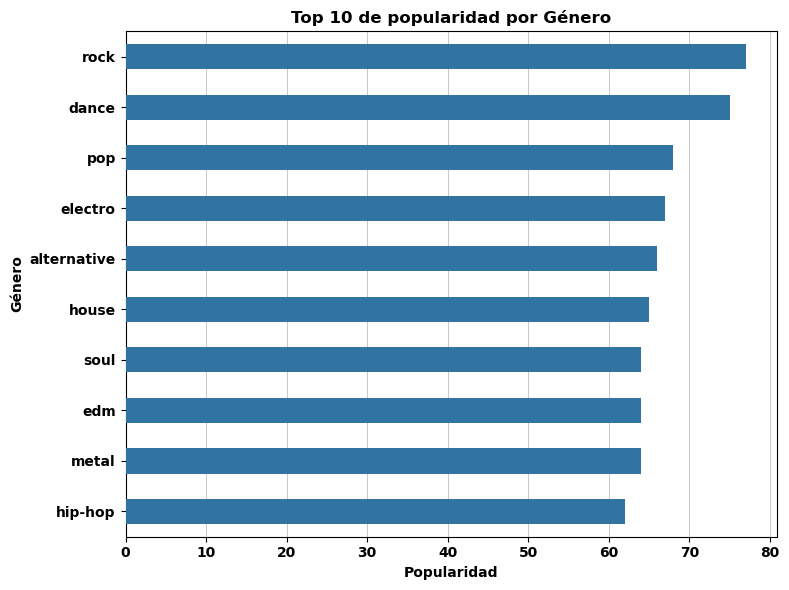

In [26]:
fig, axes = plt.subplots(figsize=(8, 6))

sns.barplot(x=top_genres.values, y=top_genres.index, ax=axes, orient='h', zorder=3, width=0.5)
axes.set_title(f'Top {top_n} de popularidad por Género')
axes.set_xlabel('Popularidad')
axes.set_ylabel('Género')
axes.xaxis.grid(linestyle='-', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()

Observaciones: La mediana de popularidad del top 10 de géneros ronda entre los 60 y 70 puntos de popularidad.

### Distribución de columnas numéricas

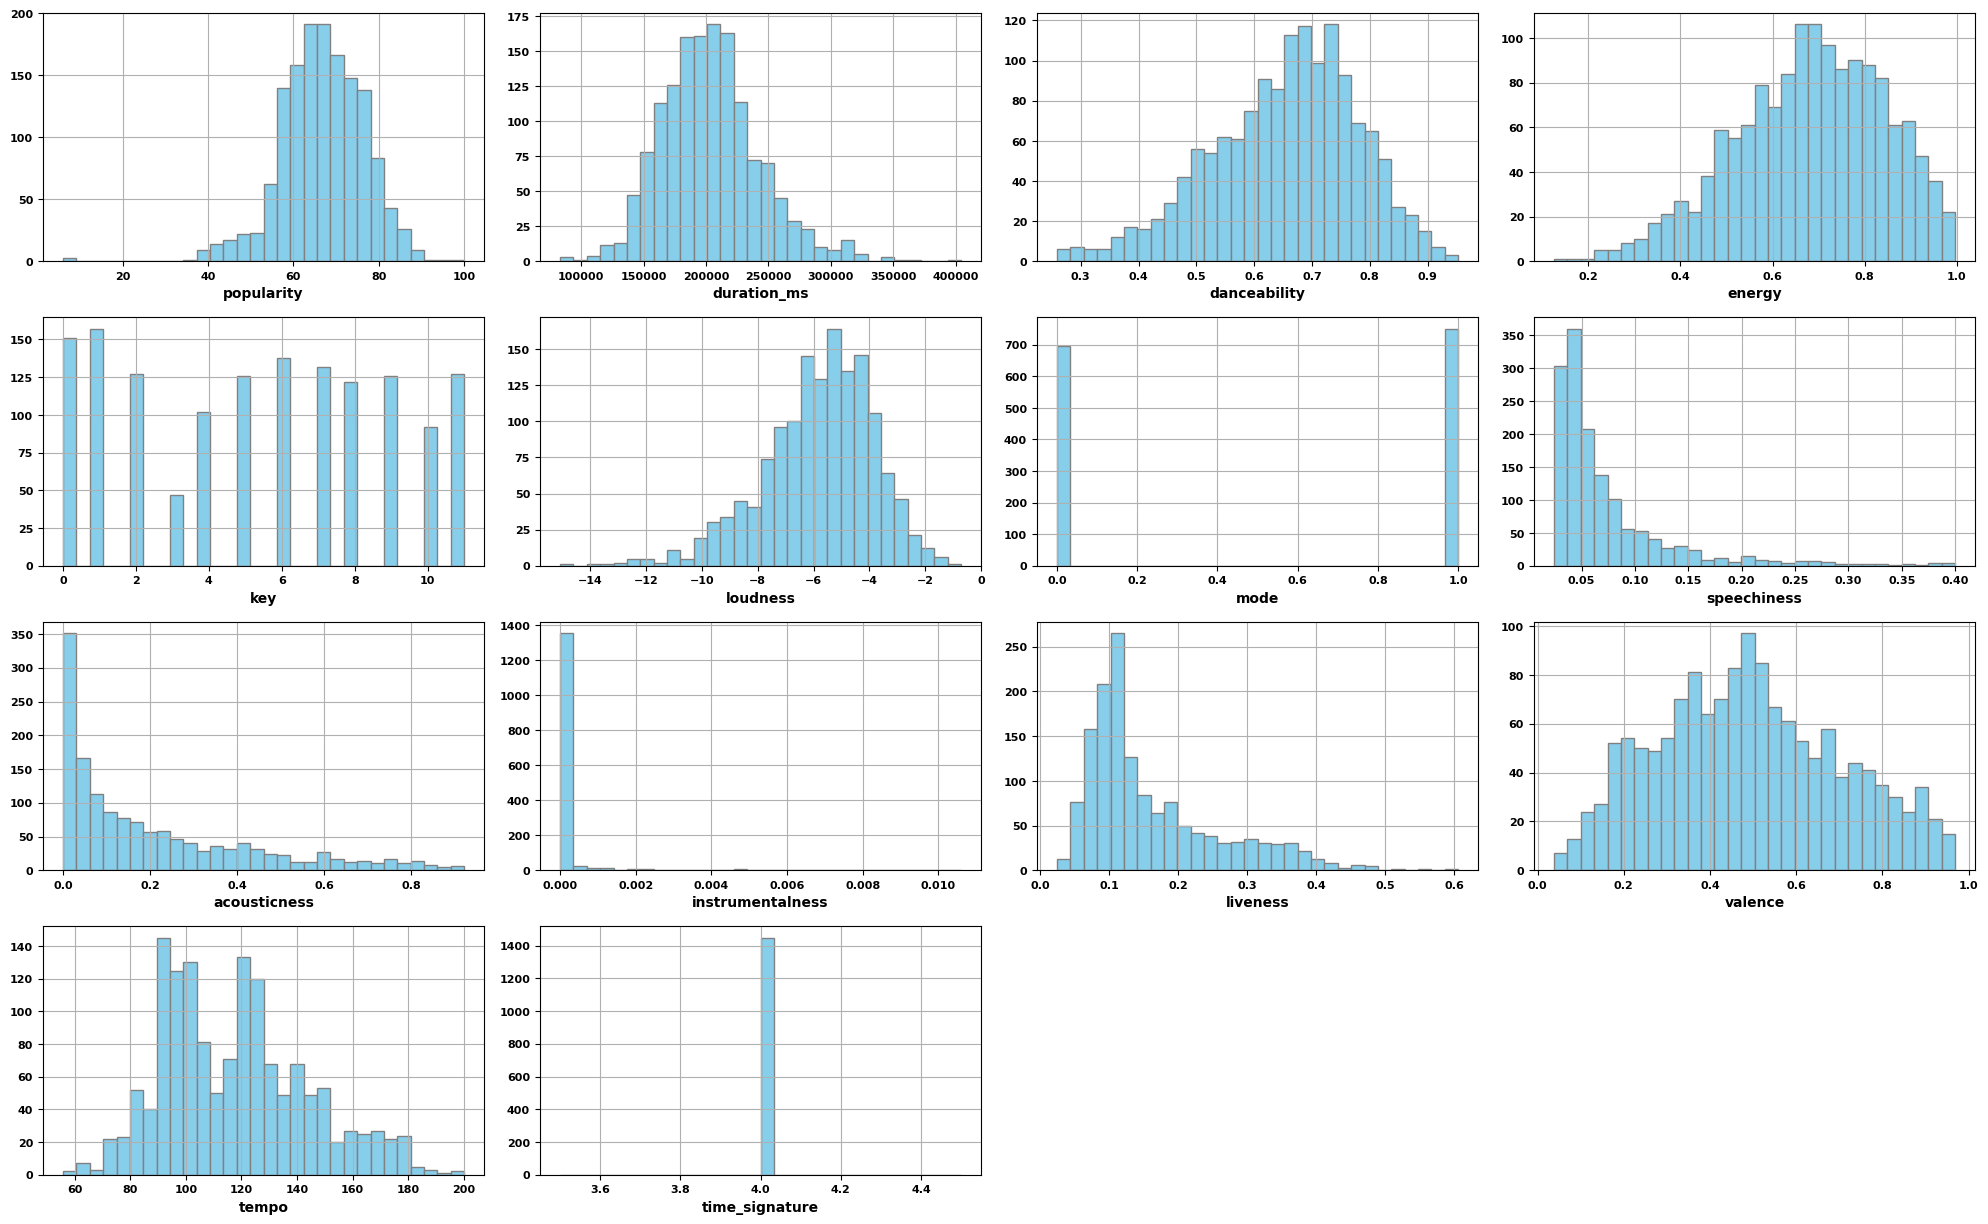

In [27]:
plt.figure(figsize=(20, 15))
cols = len(numerical_cols.columns)
num_cols = 4
num_rows = round(cols/num_cols)+1
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(num_rows, num_cols, i+1)  
    plt.hist(numerical_cols[col], bins=30, color='skyblue', edgecolor='gray')  
    plt.xlabel(col)  
    plt.xticks(fontsize=8)  
    plt.yticks(fontsize=8)  
    plt.grid(True)  

plt.tight_layout()  
plt.show()

Observaciones:

* Las columnas `popularity`,`danceability`, `energy` y `loudness` tienen distribuciones cercanas a la normal pero sesgadas a la derecha.
* La columna `duration_ms` por el contrario, está un poco sesgada hacia la izquierda.
* La columna `liveness`, también sesgada a la izquierda pero mas pronunciada con valores entre 0 y 1.
* Las columna `speechiness` y `acousticness` tiene distribución logarítimicas, con mayoría de canciones con valores cercanos a 0.
* Lo mismo ocurre con `instrumentalness`aunque una distribución muy concentrada cercana a 0.
* La columna `key` tiene valores distintos de 0 a 11, distribuidos de manera bastante uniforme.
* La columna `mode` tiene 2 valores, 0 y 1, con el valor 1 dominando pero muy parejos.
* La columna `time_signature` tiene solo canciones con un valor de 4.

### Distribución de popularidad

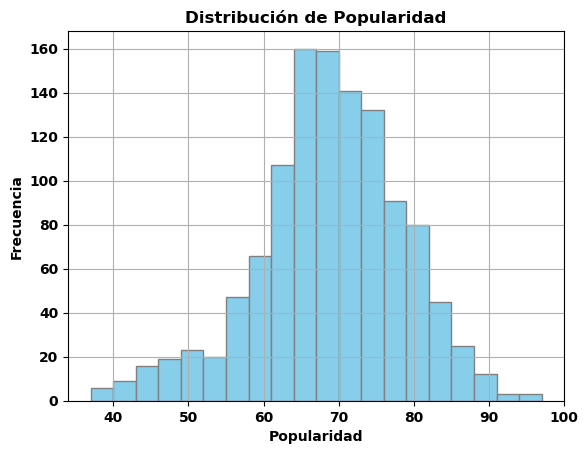

In [42]:
plt.hist(df_top_genres['popularity'], bins=20, color='skyblue', edgecolor='gray')
plt.title('Distribución de Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Observaciones:
Se puede ver que la distribución de popularidad, tiene 2 picos marcados uno cercano a 0 y otro cercano a 20, a pesar de haberse eliminado los outliers.
El pico cercano a 0 se incrementa considerablemente cuando trabajamos con toda la muestra.

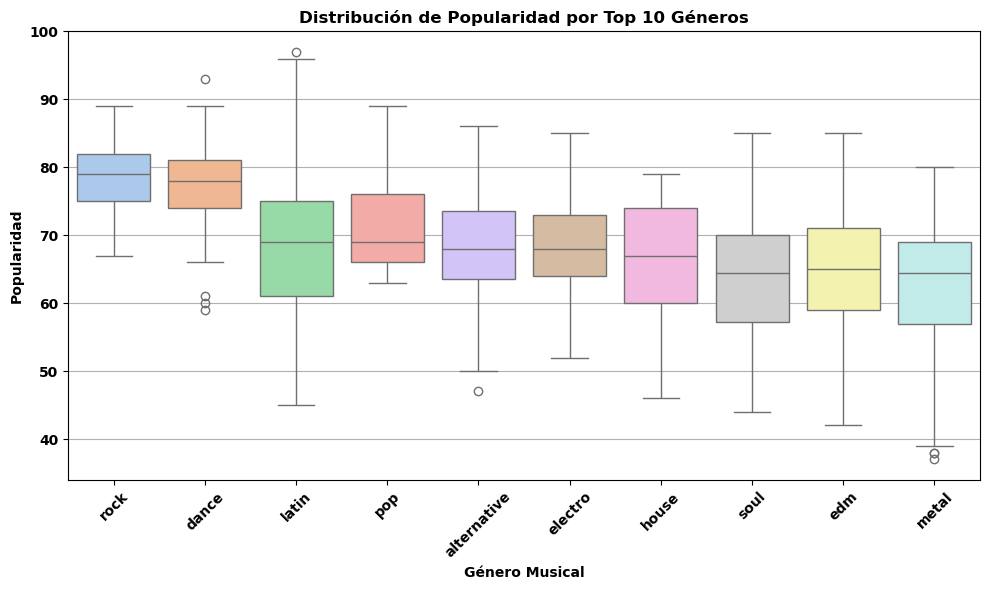

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='track_genre', y='popularity', data=df_top_genres, hue='track_genre', palette='pastel')
plt.title(f"Distribución de Popularidad por Top {top_n} Géneros")
plt.xlabel('Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observaciones:
En este gráfico se puede ver que todos los géneros tienen una popularidad similar, con algunas diferencias como el género _latino_ que tiene una distribución mas amplia, los géneros _chill_ y _pop-film_ con una distribución mas acotada centrada cerca de 60 y _k-pop_ y _metal_ con una distribución sesgada a la derecha.

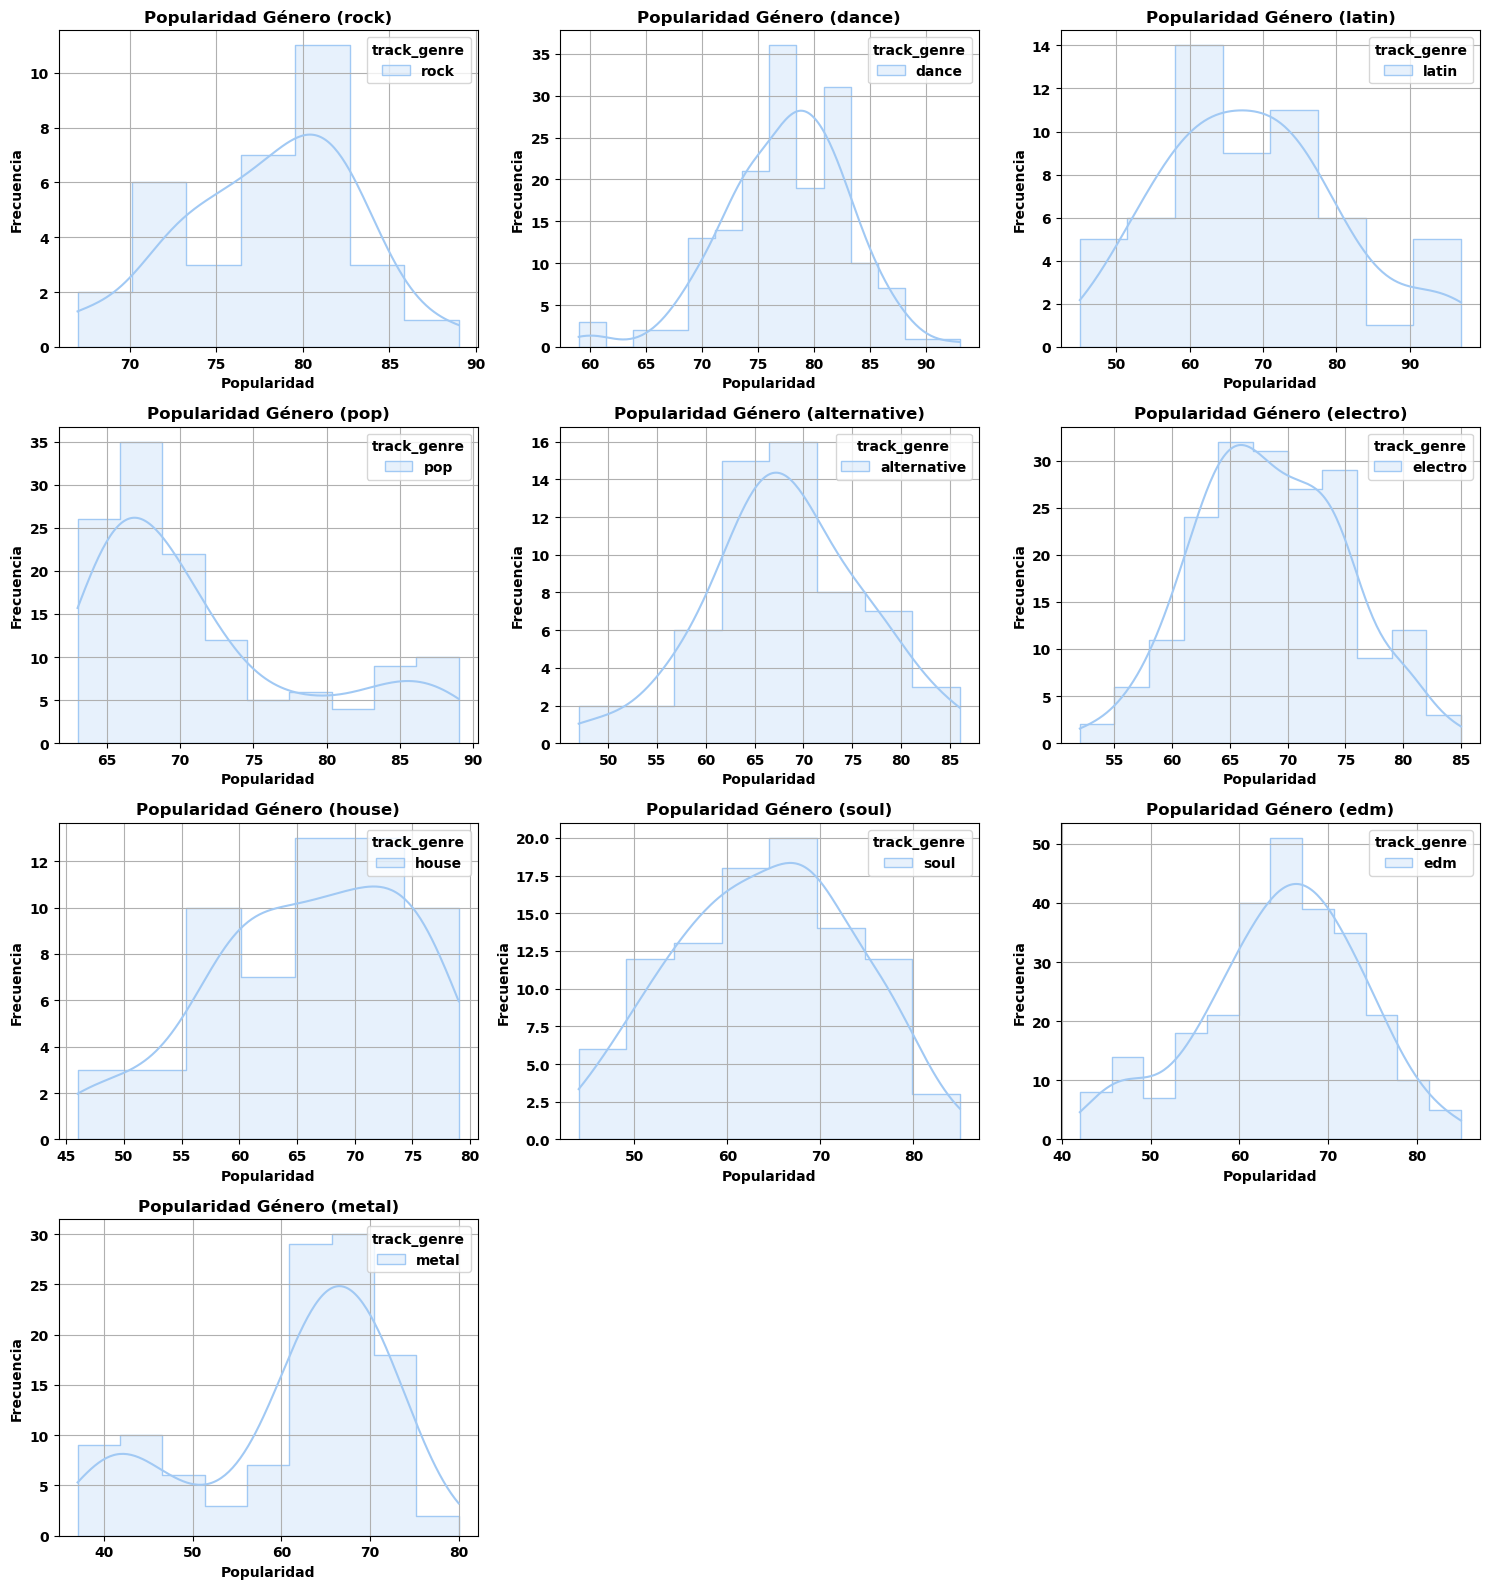

In [44]:
unique_genres = df_top_genres['track_genre'].unique()

cols =  len(unique_genres)
num_cols = 3
num_rows = round(cols/num_cols)+1

plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, genre in enumerate(unique_genres):
    plt.subplot(num_rows, num_cols, i+1)  
    sns.histplot(data=df[df['track_genre'] == genre], x='popularity', hue='track_genre', kde=True, palette='pastel', fill=True,element='step')
    
    plt.title(f'Popularidad Género ({genre})')
    plt.xlabel('Popularidad')
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()
plt.show()


Observaciones:
La mayoría de los géneros análizados tienen una distribución tendiendo a la normal.

## Distribución de "duración de pista"

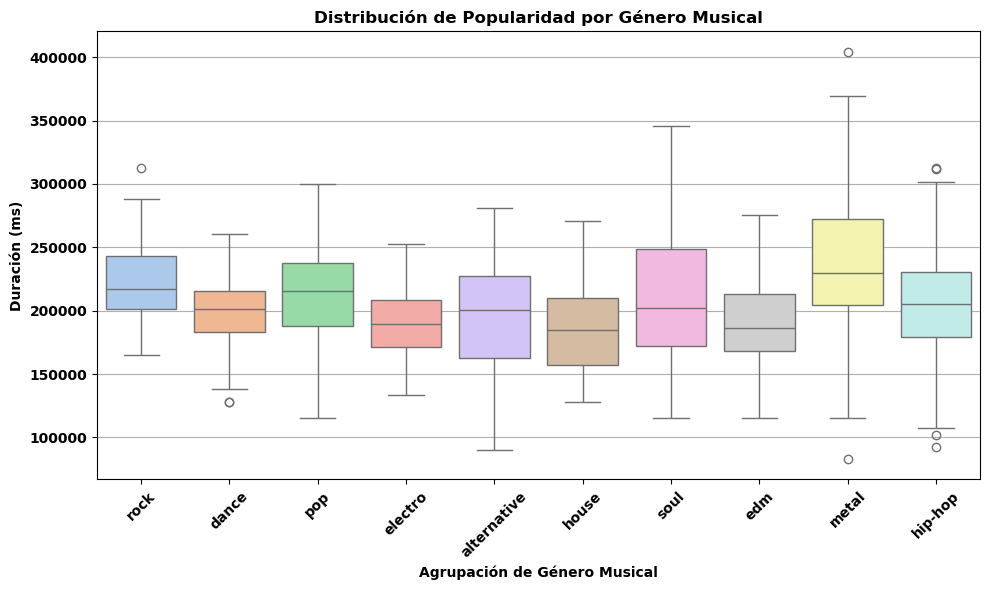

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='track_genre', y='duration_ms', data=df_top_genres, hue='track_genre', palette='pastel')
plt.title('Distribución de Popularidad por Género Musical')
plt.xlabel('Agrupación de Género Musical')
plt.ylabel('Duración (ms)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observaciones:
Se observan que todos los grupos de generos musicales analizados del top de géneros musicales por popularidad, tiene una distribución de duración similar.

### Gráfico comparativo de características por agrupación de género musical

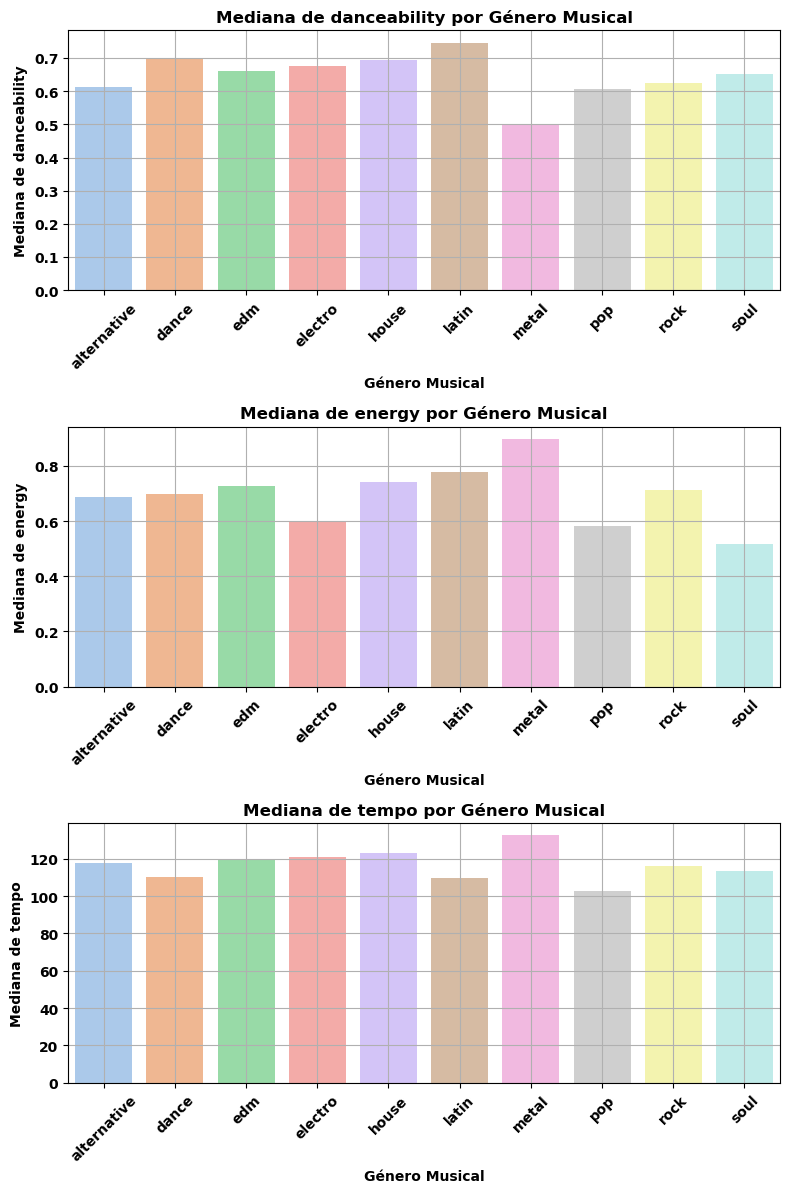

In [46]:
characteristics = ['danceability', 'energy', 'tempo']
plt.figure(figsize=(8, 15))

cols =  len(characteristics)
num_cols = 1
num_rows = round(cols/num_cols)+1
for i, characteristic in enumerate(characteristics, 1):
    df_top_genres_pivot = df_top_genres.pivot_table(index='track_genre', values=characteristics, aggfunc='median').reset_index()
    
    plt.subplot(num_rows, num_cols, i)
    sns.barplot(data=df_top_genres_pivot, x='track_genre', y=characteristic, hue='track_genre', palette='pastel')
    plt.title(f'Mediana de {characteristic} por Género Musical')
    plt.xlabel('Género Musical')
    plt.ylabel(f'Mediana de {characteristic}')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

Observaciones:

No parece haber ninguna relación entre las variables.